<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [3]:
sac = pd.read_csv(sac_csv)

sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
sac.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [6]:
sac.shape

(985, 12)

In [8]:
sac.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1312.918782,856.123224,-984.000000,950.000000,1304.000000,1718.000000,5822.000000
price,985.0,233715.951269,139088.818896,-210944.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.445121,5.103637,-121.503471,38.482704,38.625932,38.695589,39.020808
longitude,985.0,-121.193371,5.100670,-121.551704,-121.446119,-121.375799,-121.294893,38.668433


In [30]:
msk = sac['sq__ft'] == 0

sac[msk]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378


In [17]:
sac_cats = ['zip', 'beds', 'baths', 'type']

for cat in sac_cats:
    print sac[cat].value_counts()

95648    72
95823    61
95828    45
95758    44
95838    37
95835    37
95757    36
95624    34
95843    33
95621    28
95822    24
95820    23
95762    23
95842    22
95834    22
95632    21
95660    21
95670    21
95608    20
95678    20
95833    20
95747    20
95815    18
95826    18
95630    17
95825    13
95673    13
95824    12
95832    12
95742    11
         ..
95661     8
95610     7
95817     7
95818     7
95841     7
95677     6
95821     6
95864     5
95603     5
95693     5
95819     4
95816     4
95683     4
95626     4
95726     3
95691     3
95814     3
95746     3
95623     2
95650     2
95811     2
95614     1
95619     1
95663     1
95631     1
95633     1
95635     1
95655     1
95690     1
95722     1
Name: zip, Length: 68, dtype: int64
3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
Name: beds, dtype: int64
2    544
1    180
3    132
0    108
4     19
5      2
Name: baths, dtype: int64
Residential     917
Condo            54
Multi-Family   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112cf2590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112ec11d0>]], dtype=object)

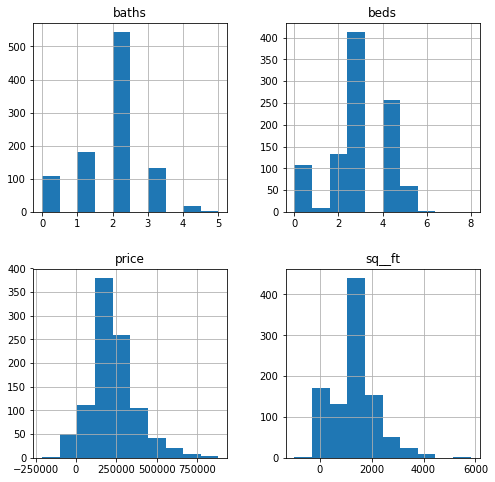

In [13]:
sac_conts = ['beds', 'baths', 'sq__ft', 'price']

sac[sac_conts].hist(figsize = (8, 8))

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [16]:
list(sac.columns)

['street',
 'city',
 'zip',
 'state',
 'beds',
 'baths',
 'sq__ft',
 'type',
 'sale_date',
 'price',
 'latitude',
 'longitude']

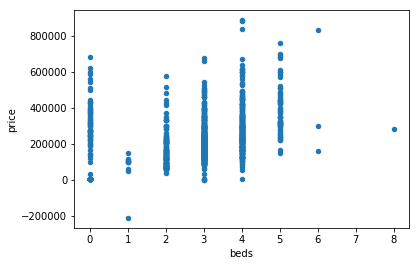

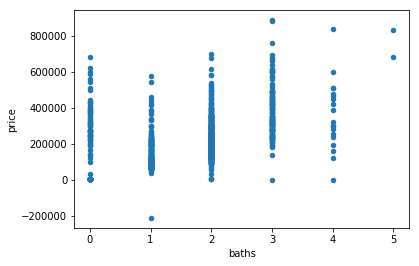

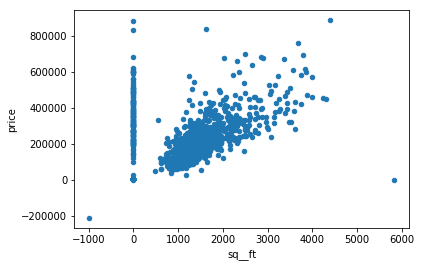

In [19]:
predictors = ['beds', 'baths', 'sq__ft']

for p in predictors:
    sac.plot.scatter(p, 'price')

In [ ]:
predictors = ['beds', 'baths', 'sq__ft']

for pred in predictors:
    

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = sac[["sq__ft"]]
y = sac[["price"]]

lm = LinearRegression()

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lm.score(X, y)

0.11534735226635717

In [33]:
print lm.coef_

[[ 55.17721241]]


In [35]:
# This is messy, but fun: subset out 0 values fit model and see what's up
predictors = ['beds', 'baths', 'sq__ft']

for pred in predictors:
    msk = sac[pred] == 0
    df = sac[~msk]
    
    X = df[[pred]]
    y = df[['price']]
    
    lm_pred = LinearRegression()
    lm_pred.fit(X, y)
    
    print "-----------------------------------------"
    print "Linear Regression on", pred
    print pred, "Coefficient:", lm_pred.coef_
    print pred, "Score:", lm_pred.score(X, y)
    print "-----------------------------------------"

-----------------------------------------
Linear Regression on beds
beds Coefficient: [[ 69349.29079865]]
beds Score: 0.209374467756
-----------------------------------------
-----------------------------------------
Linear Regression on baths
baths Coefficient: [[ 101296.71037169]]
baths Score: 0.27690230574
-----------------------------------------
-----------------------------------------
Linear Regression on sq__ft
sq__ft Coefficient: [[ 126.14428564]]
sq__ft Score: 0.488821096481
-----------------------------------------


In [38]:
# Let's fit one with all three (first take out all the 0s)

msk = (sac['beds'] != 0) & (sac['baths'] != 0) & (sac['sq__ft'] != 0)

lm_df = sac[msk]

print lm_df.shape
lm_df.head()

(814, 12)


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [43]:
preds = lm_df[predictors]
outcome = lm_df['price']

lm2 = LinearRegression()
lm2.fit(preds, outcome)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lm2.coef_

array([-11767.24881298,   3913.12424277,    133.7829259 ])

In [45]:
lm2.score(preds, outcome)

0.49203006539467031

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [6]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [7]:
# A:

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: